In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing


In [2]:
dtree=pd.read_csv('AllElectronics.csv')

In [3]:
print(dtree)

    RID          age  income student credit_rating class_buys_computer
0     1        youth    high      no          fair                  no
1     2        youth    high      no     excellent                  no
2     3  middle_aged    high      no          fair                 yes
3     4       senior  medium      no          fair                 yes
4     5       senior     low     yes          fair                 yes
5     6       senior     low     yes     excellent                  no
6     7  middle_aged     low     yes     excellent                 yes
7     8        youth  medium      no          fair                  no
8     9        youth     low     yes          fair                 yes
9    10       senior  medium     yes          fair                 yes
10   11        youth  medium     yes     excellent                 yes
11   12  middle_aged  medium      no     excellent                 yes
12   13  middle_aged    high     yes          fair                 yes
13   1

In [4]:
header=dtree.columns.values.tolist()
labelList=dtree.iloc[:,-1]
print(labelList)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: class_buys_computer, dtype: object


In [5]:
vec=DictVectorizer()

dtree=dtree.iloc[:,1:]
dtree=dtree.iloc[:,:-1]
print(dtree)
x_data=vec.fit_transform(dtree.to_dict(orient='record')).toarray()
print(vec.get_feature_names())
print(x_data)
lb=preprocessing.LabelBinarizer()
y_data=lb.fit_transform(labelList)
print(y_data)

            age  income student credit_rating
0         youth    high      no          fair
1         youth    high      no     excellent
2   middle_aged    high      no          fair
3        senior  medium      no          fair
4        senior     low     yes          fair
5        senior     low     yes     excellent
6   middle_aged     low     yes     excellent
7         youth  medium      no          fair
8         youth     low     yes          fair
9        senior  medium     yes          fair
10        youth  medium     yes     excellent
11  middle_aged  medium      no     excellent
12  middle_aged    high     yes          fair
13       senior  medium      no     excellent
['age=middle_aged', 'age=senior', 'age=youth', 'credit_rating=excellent', 'credit_rating=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']
[[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1.

In [6]:
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_data,y_data)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
x_test=x_data[5]
predict=model.predict(x_test[np.newaxis,:])

print(predict)

[0]


In [8]:
#画出决策树图
import graphviz

In [19]:
dot_data=tree.export_graphviz(model,
                              out_file=None,
                              feature_names=vec.get_feature_names(),
                              class_names=lb.classes_,
                              filled=True,
                              rounded=True,
                              special_characters=True
                             )


In [20]:
graph=graphviz.Source(dot_data)
graph.render('computer')

'computer.pdf'

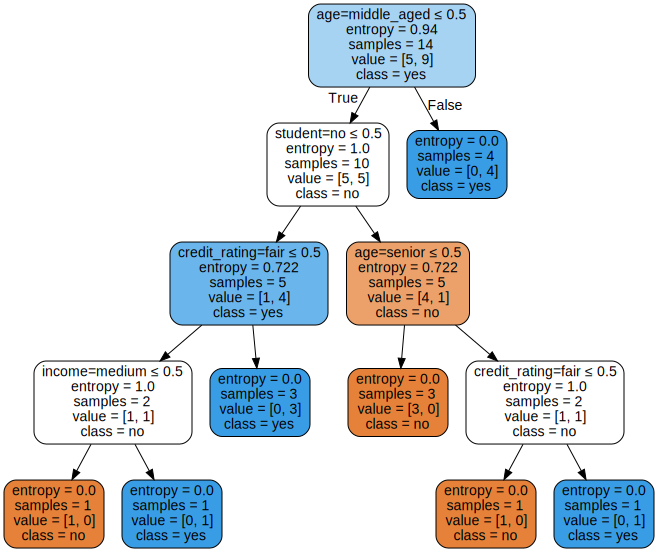

In [21]:
graph